# РГР 1. Статичтическая обработка данных

In [3]:
# подключение необходимых библиотек
import numpy
import scipy.stats
import seaborn
import pandas
from matplotlib.pyplot import *

%matplotlib inline

# настройка вывода вещественых чисел (не использовать запись вида 1.4e01)
numpy.set_printoptions(suppress=True)

In [4]:
# загрузим данные из файла
# здесь файл расположен в папке task1, которая расположена в той же папке, что и эта программа
data = pandas.read_csv("task1/V29.csv")

# удалим нулевой столбец, который содержит порядковые номера для пар X и Y (см. файл)
del data [data.columns[0]] 

# краткая информация о данных
print(data.describe())

# вычислим основные числовые характеристики
meanX = numpy.mean(data.X)
sdX = numpy.std( data.X , ddof=1)
medX = numpy.median(data.X)
modeX = scipy.stats.mode(data.X)

print()
print( "Мода : {:.2f}".format(medX))

                X           Y
count  100.000000  100.000000
mean    15.898900   16.361600
std      6.141621    5.743515
min     -0.980000    1.240000
25%     12.195000   12.560000
50%     15.265000   16.140000
75%     20.240000   20.130000
max     32.270000   28.590000

Мода : 15.27


### Проверка гипотезы о нормальности распределения

$H_0$: выборка сделана из нормально распределённой ген. совокупности

см. спраку по функции normaltest: help( scipy.stats.normaltest )

Проверка осуществляется по p-value

In [5]:
help( scipy.stats.normaltest )

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0, nan_policy='propagate')
    Test whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    
    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        ``s^2 + k^2``, wh

In [6]:
scipy.stats.normaltest(data.X)

NormaltestResult(statistic=0.22671675252876272, pvalue=0.8928306334673161)

## Проверка гипотезы о равенстве средних

$H_0$: средние равны

In [7]:
help(scipy.stats.ttest_rel)

Help on function ttest_rel in module scipy.stats.stats:

ttest_rel(a, b, axis=0, nan_policy='propagate')
    Calculate the T-test on TWO RELATED samples of scores, a and b.
    
    This is a two-sided test for the null hypothesis that 2 related or
    repeated samples have identical average (expected) values.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape.
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        t-statistic
    pvalue : float or array
        two-tailed p-value
    
    Notes
    -----
    Examples for the use are sco

In [8]:
scipy.stats.ttest_rel(data.X, data.Y)

Ttest_relResult(statistic=-0.6187492865423821, pvalue=0.5375026578244357)

## Диаграмма boxplot или "ящик с усами"

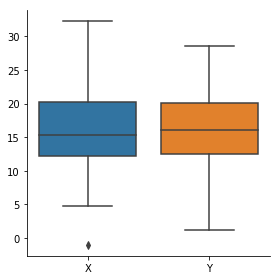

In [9]:
seaborn.factorplot(data=data, kind="box")

## Проверка гипотезы о равенстве выборочного срднего математическому ожиданию генеральной совокупности

In [10]:
scipy.stats.ttest_1samp(data.X, meanX)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

## вычисление коэффициента корреляции Пирсона (линейного к.к.)

In [11]:
scipy.stats.pearsonr(data.X, data.Y)

(0.20960131387657233, 0.03635185331277084)

## Диаграмма рассеивания с линией регрессии (и гистограммы)

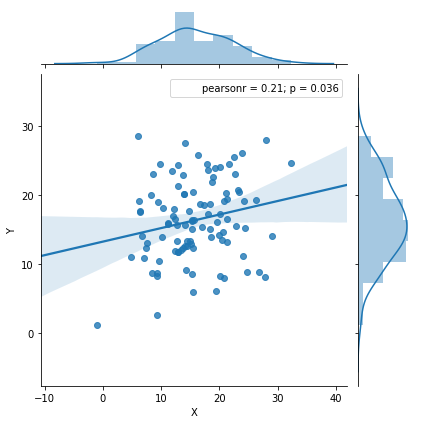

In [12]:
seaborn.jointplot(data.X, data.Y, kind='reg')

Для того чтобы компактно представить выборку, пусть и с небольшой потерей точности, построим интервальный вариационный ряд.


## Построение вариационного ряда, получение относительных частот 


Для построения интервального вариационного ряда определи ширину интервалов. Для этого определим число интервалов по эмпирической формуле:
$$ n = [ log_2(N) ] $$
где N - объём выборки,

[ ] - обозночают целую часть числа

Тогда ширина интервала:

$$ h = \frac{max(X) - min(X)}{n-1} $$


Левую границу первого интервала отодвиним влево на $0.5 h$, чтобы минимальное значение выборки не лежало на границе первого интервала.

In [1]:
# from math import *

# # объём выборки (число значений в массиве X)
# N = X.size

# # число и ширина интервалов
# n = 1 + int( log2( N ))
# h = (max(X)-min(X)) / (n-1)

# print(f"Ширина интервала {h:.2f}")

# # Определим новые границы интервалов.
# min_x = min(X)
# max_x = max(X)

# print(f"min X: {min_x:.2f}")
# print(f"max X: {max_x:.2f}")

# intervals = []
# left = min_x - h/2
# for i in range(1, n+1):
#     intervals += [ (left + h*(i-1), 
#                     left + h*i) ]

    
# # преобразуем intervals в двумерный массив
# intervals = np.array(intervals)
# print("Интервалы")
# print(intervals)

NameError: name 'X' is not defined